# 911 calls 

### Data Description


lat : String variable, Latitude

lng: String variable, Longitude

desc: String variable, Description of the Emergency Call

zip: String variable, Zipcode

title: String variable, Title

timeStamp: String variable, YYYY-MM-DD HH:MM:SS

twp: String variable, Township

addr: String variable, Address

e: String variable, Dummy variable (always 1)


### Objectives:

1) Creating new feature columns.

2) Exploring data through visualisations.

#### Importing required libraries for Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading the data

In [2]:
data = pd.read_csv('911.csv')

#### Getting the info of data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### Checking head of data

In [4]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Checking the top 5 zipcodes: 

In [5]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Checking the top 5 township:

In [6]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Checking for different title.

In [7]:
data['title'].nunique()

110

### Creating new features.

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.

In [8]:
data['Reason'] = data['title'].apply(lambda title : title.split(':')[0])

In [9]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


**Checking the Most Common reason for 911 calls.

In [10]:
data['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Creating the pie chart for checking the distribution of calls with different reasons

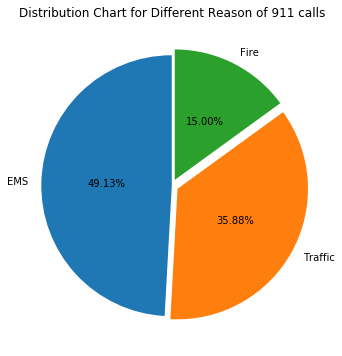

In [11]:
plt.rcParams['figure.figsize'] = (8,6)
data['Reason'].value_counts().plot(kind = 'pie',startangle = 90, pctdistance = 0.5,autopct = '%.2f%%',
                                   explode = [0,0.05,0.05],labels = ['EMS','Traffic','Fire'])
plt.title('Distribution Chart for Different Reason of 911 calls')
plt.axis('off')
plt.show()


EMS is the most common reason to call 911.

#### Now Let's Focus on the Time column.

What is the data type of timeStamp column

In [12]:
type(data['timeStamp'][0])


str

We can see that the timeStamp column is not in the Datetime format

In [13]:
#Converting time from str to datetime format.

data['time'] = pd.to_datetime(data['timeStamp'])

In [14]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01


#### Creating more features by extracting data from old feature.

In [15]:
# We can create day,month,dayofweek,hour column to have more deep analysis on time.
data['date'] = data['time'].apply(lambda time : time.date())
data['hour'] = data['time'].apply(lambda time : time.hour)
data['month'] = data['time'].apply(lambda time : time.month)
data['dayofweek'] = data['time'].apply(lambda time : time.dayofweek)

In [16]:
data.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time,date,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10,17,12,3


Mapping the day of week to the days

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}

data['dayofweek'] = data['dayofweek'].map(dmap)

In [18]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time,date,hour,month,dayofweek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,2015-12-10,17,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,2015-12-10,17,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,2015-12-10,17,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,2015-12-10,17,12,Thur
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,2015-12-10,17,12,Thur


In [19]:
data['dayofweek'].value_counts()

Tue     15150
Wed     14879
Fri     14833
Mon     14680
Thur    14478
Sat     13336
Sun     12136
Name: dayofweek, dtype: int64

Now let us look into which hour the call was high through plot

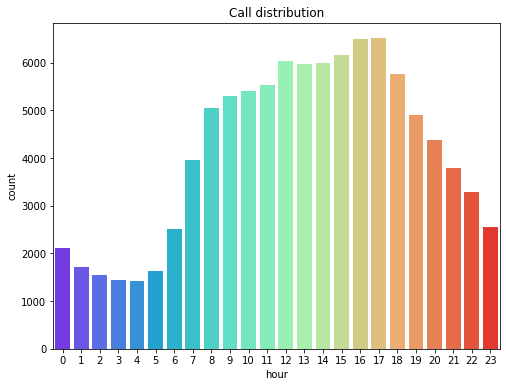

In [20]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x= data['hour'],data = data,palette = 'rainbow')
plt.title('Call distribution')
plt.show()

From morning 8 am to eveining 6 pm most of the calls were made specially after 3pm.

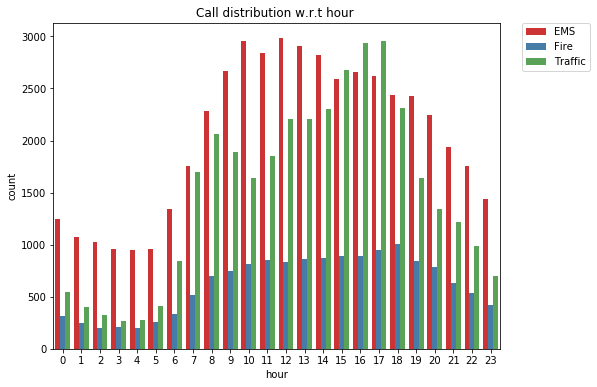

In [21]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x= data['hour'],data = data,palette = 'Set1',hue = data['Reason'])
plt.title('Call distribution w.r.t hour ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As we know most common reason of calls was EMS but at the evening time from 3pm to 6pm most calls were made because of traffic.


Now,Lets check for the days having high calls for all the three reasons.

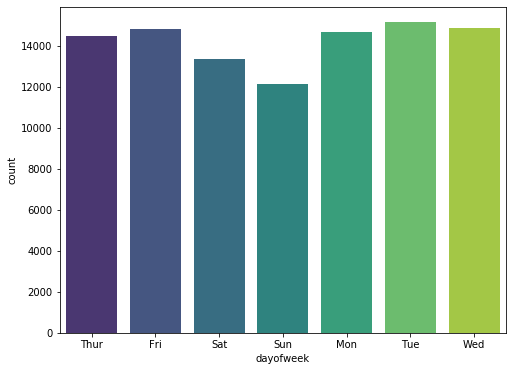

In [22]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x = data['dayofweek'],data = data,palette = 'viridis')
plt.show()

Except on saturdays and sundays for all the days number of calls are high.

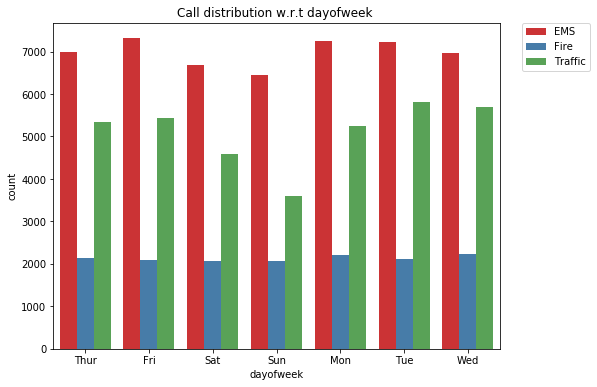

In [23]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x= data['dayofweek'],data = data,palette = 'Set1',hue = data['Reason'])
plt.title('Call distribution w.r.t dayofweek ')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

EMS calls were high for the whole week specially on friday,monday and tuesday.

#### Which month has the highest no of call?

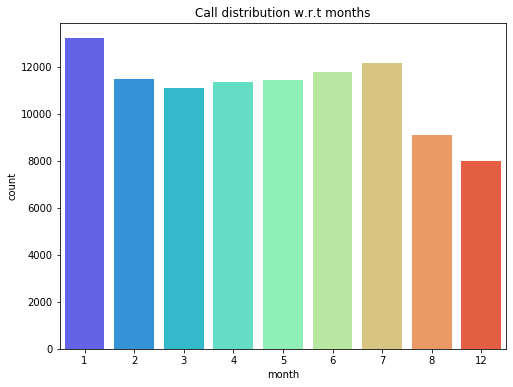

In [24]:
plt.rcParams['figure.figsize'] = (8,6)
sns.countplot(x= data['month'],data = data,palette = 'rainbow')
plt.title('Call distribution w.r.t months')
plt.show()

As per the provided data month of january has the highest number of calls.

Call details for 9,10,11 month is not available.




Create group by object for month 

In [25]:
bymonth = data.groupby('month').count()

In [26]:
bymonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time,date,hour,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


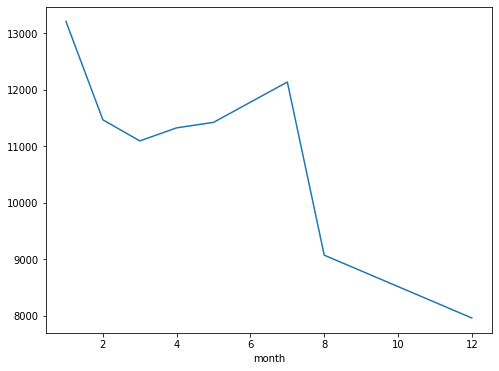

In [27]:
bymonth['twp'].plot()

From the plot we can assume that the number of calls for the month 9-Sep, 10-Oct and 11-Nov were between 8000 - 9000.

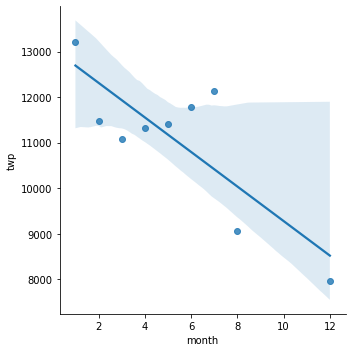

In [28]:
sns.lmplot(x='month',y='twp',data= bymonth.reset_index())

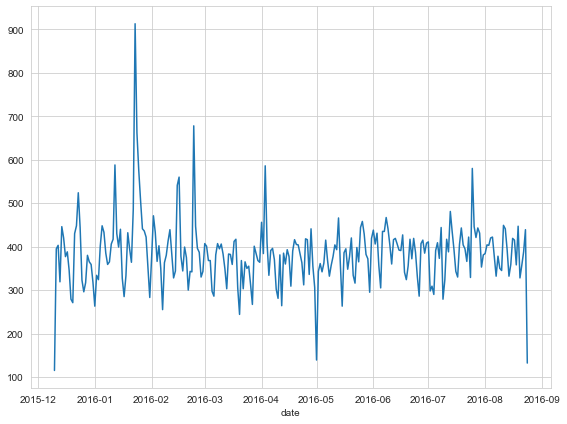

In [29]:
sns.set_style('whitegrid')
data.groupby(['date']).count()['twp'].plot()
plt.tight_layout()

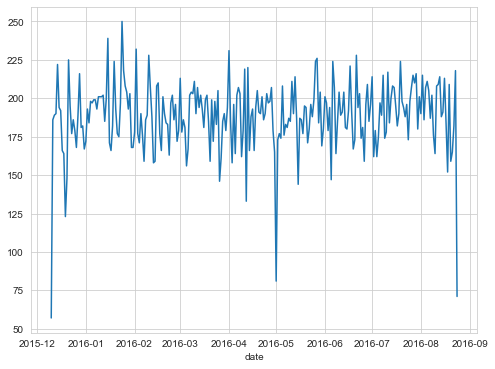

In [30]:
data[data['Reason']== 'EMS'].groupby('date').count()['twp'].plot()
plt.show()

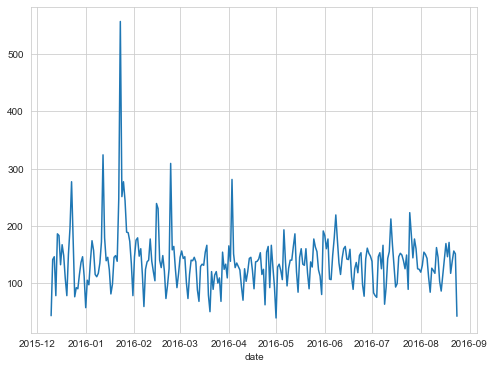

In [31]:
data[data['Reason'] == 'Traffic'].groupby('date').count()['twp'].plot()


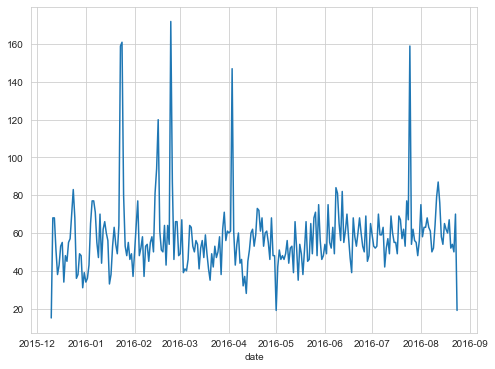

In [32]:
data[data['Reason'] == 'Fire'].groupby('date').count()['twp'].plot()

In [33]:
bymonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,time,date,hour,dayofweek
month,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [34]:
dayhour = data.groupby(['dayofweek','hour']).count()['Reason'].unstack()

In [35]:
dayhour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayofweek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thur,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


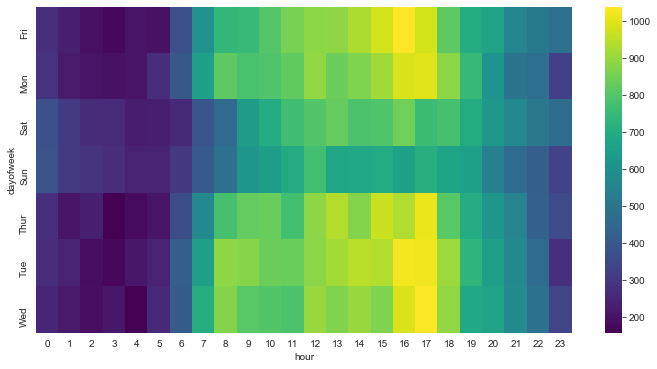

In [36]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

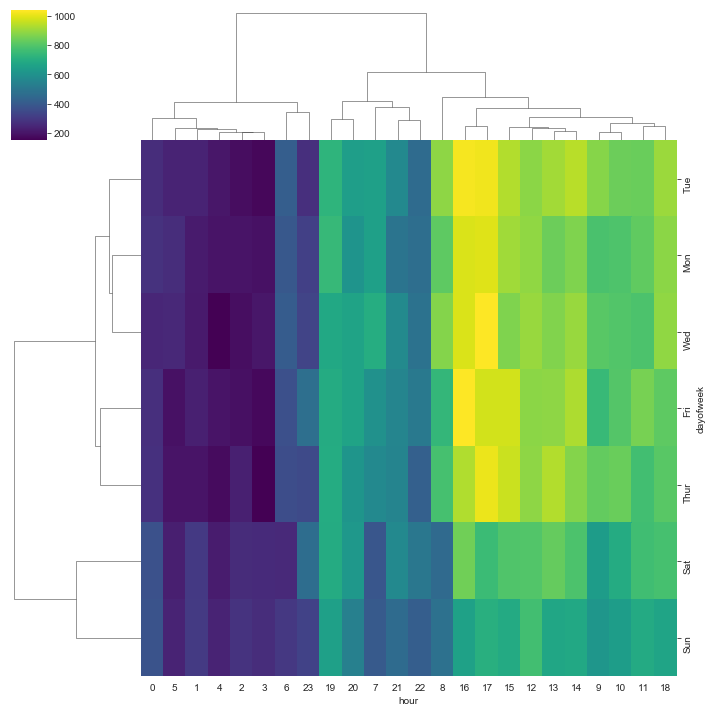

In [37]:
sns.clustermap(dayhour,cmap = 'viridis')

In [38]:
daymonth = data.groupby(['dayofweek','month']).count()['Reason'].unstack()
daymonth

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thur,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


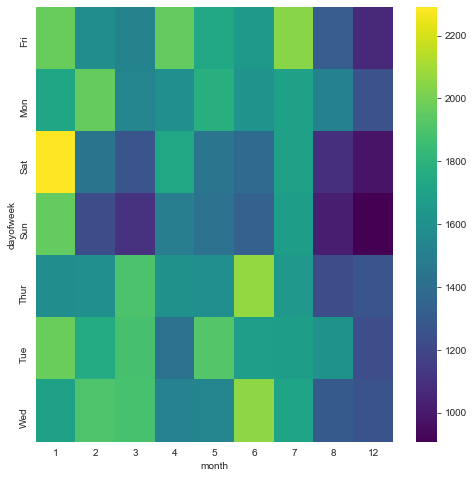

In [39]:
plt.rcParams['figure.figsize'] = (8,8)
sns.heatmap(daymonth,cmap = 'viridis')
plt.show()

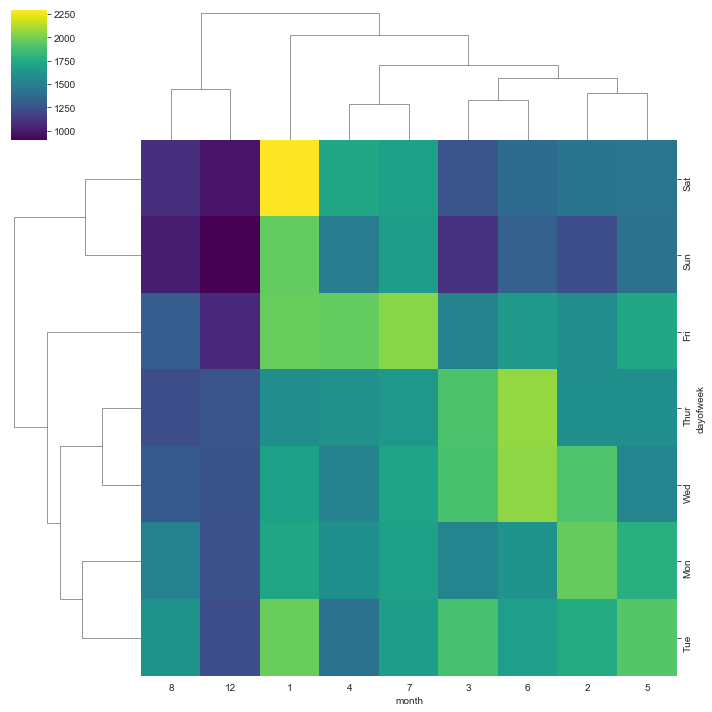

In [40]:
plt.rcParams['figure.figsize'] = (8,8)
sns.clustermap(daymonth ,cmap = 'viridis')

Lets check which town has the most 911 calls


In [41]:
data['twp'].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

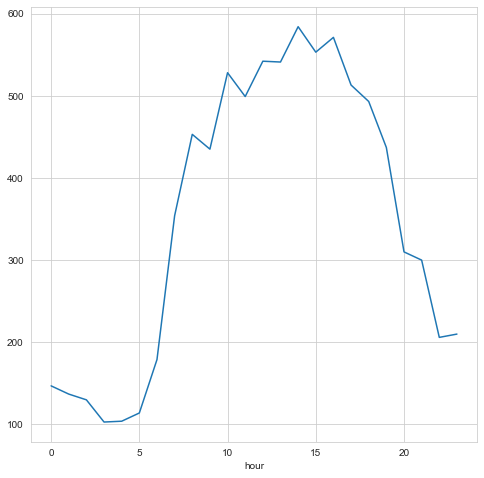

In [42]:
data[data['twp']=='LOWER MERION'].groupby('hour').count()['twp'].plot()

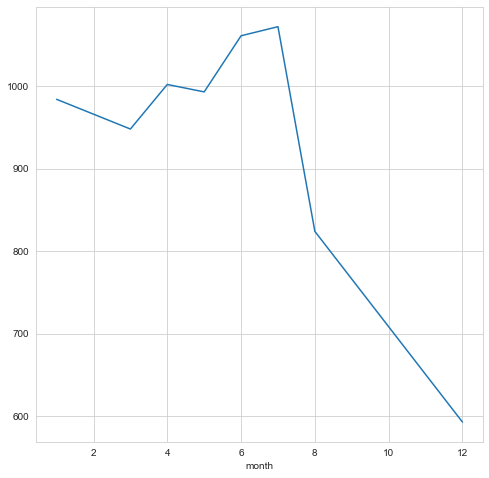

In [43]:
data[data['twp']=='LOWER MERION'].groupby('month').count()['twp'].plot()

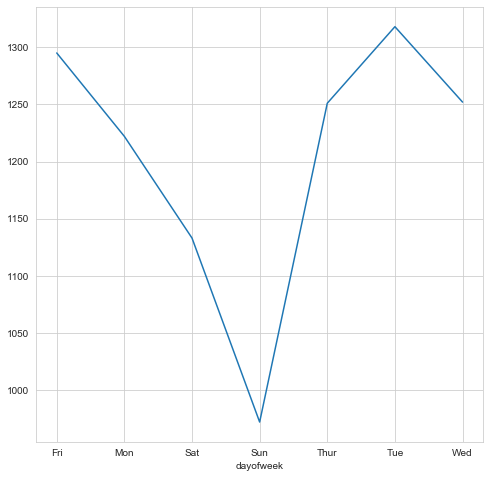

In [44]:
data[data['twp']=='LOWER MERION'].groupby('dayofweek').count()['twp'].plot()

In [45]:
data[data['twp']=='LOWER MERION'].groupby('Reason').count()['twp']

Reason
EMS        3171
Fire       1548
Traffic    3724
Name: twp, dtype: int64

LOWER MERION is the township with the highest 911 calls with most common reason Traffic.

In [46]:
data[data['Reason']=='EMS'].groupby('twp').count()['e'].sort_values()

twp
PHILA COUNTY        5
GREEN LANE         21
LEHIGH COUNTY      21
BRYN ATHYN         73
SALFORD            74
                 ... 
CHELTENHAM       2098
POTTSTOWN        2635
ABINGTON         3043
LOWER MERION     3171
NORRISTOWN       3858
Name: e, Length: 68, dtype: int64

In [47]:
data[data['Reason']== 'Traffic'].groupby('twp').count()['e'].sort_values()

twp
LEHIGH COUNTY         5
BERKS COUNTY         15
GREEN LANE           21
DELAWARE COUNTY      24
SCHWENKSVILLE        29
                   ... 
PLYMOUTH           1442
CHELTENHAM         1803
ABINGTON           1994
UPPER MERION       2499
LOWER MERION       3724
Name: e, Length: 68, dtype: int64

In [48]:
data[data['Reason']== 'Fire'].groupby('twp').count()['e'].sort_values()

twp
PHILA COUNTY         1
BERKS COUNTY         1
LEHIGH COUNTY        4
CHESTER COUNTY       8
GREEN LANE           9
                  ... 
UPPER MERION       663
CHELTENHAM         674
NORRISTOWN         777
ABINGTON           940
LOWER MERION      1548
Name: e, Length: 68, dtype: int64

Township which called 911 for mostly EMS reason is NORRISTOWN.
LOWER MERION town made the highest calls for traffic and fire.